In [ ]:
import os
import sys
sys.path.append(os.path.join('..', '..'))

from scripts.data_loaders.common import show_sample
from scripts.data_loaders.TIMIT import TIMITDataset
from scripts.ipa_transcription.wav2vec2 import transcribe_batch_timestamped, clear_cache, load_model

from IPython.display import clear_output
clear_output()

# Load Data

In [3]:
train = TIMITDataset("train", include_timestamps=True)
test = TIMITDataset("test", include_timestamps=True)

IPA: ðɛɹɛznoʊðɪspjuɾɨnvɔlvɨŋfil̩wɚk
Metadata: [('ð', 0, 550), ('ɛ', 550, 2317), ('ɹ', 2317, 3319), ('ɛ', 3319, 4780), ('z', 4780, 5570), ('n', 5570, 7240), ('oʊ', 7240, 8920), ('ð', 8920, 9790), ('ɪ', 9790, 10713), ('s', 10713, 12355), ('p', 12355, 14150), ('j', 14150, 14966), ('u', 14966, 16600), ('ɾ', 16600, 17161), ('ɨ', 17161, 18139), ('n', 18139, 18920), ('v', 18920, 20071), ('ɔ', 20071, 21951), ('l', 21951, 22619), ('v', 22619, 23235), ('ɨ', 23235, 24123), ('ŋ', 24123, 24543), ('', 24543, 26040), ('f', 26040, 26600), ('i', 26600, 28802), ('l̩', 28802, 30348), ('w', 30348, 31810), ('ɚ', 31810, 33857), ('k', 33857, 35340), ('', 35340, 36640)]


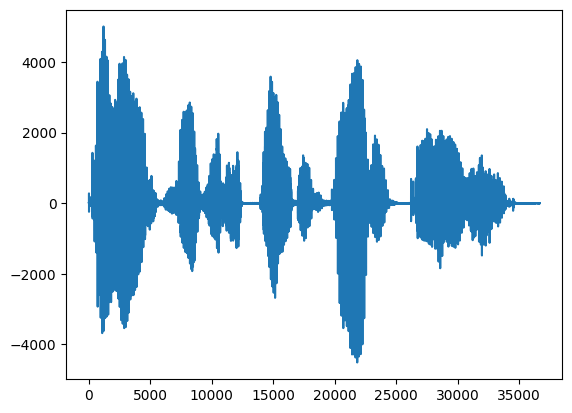

In [4]:
show_sample(train[0])

# Evaluate Timestamps

In [5]:
MODEL_ID = "KoelLabs/xlsr-english-01"
# MODEL_ID = "KoelLabs/xlsr-timit-b0"
# MODEL_ID = "KoelLabs/xlsr-timit-c0"
# MODEL_ID = "KoelLabs/xlsr-timit-d0"
# MODEL_ID = "KoelLabs/xlsr-timit-e0"
# MODEL_ID = "KoelLabs/xlsr-timit-b1"
# MODEL_ID = "KoelLabs/xlsr-timit-c1"
# MODEL_ID = "KoelLabs/xlsr-timit-d1"
# MODEL_ID = "KoelLabs/xlsr-timit-e1"
# MODEL_ID = "facebook/wav2vec2-lv-60-espeak-cv-ft"
# MODEL_ID = "mrrubino/wav2vec2-large-xlsr-53-l2-arctic-phoneme"
# MODEL_ID = "vitouphy/wav2vec2-xls-r-300m-timit-phoneme"
# MODEL_ID = "ginic/gender_split_70_female_4_wav2vec2-large-xlsr-53-buckeye-ipa"
model, processor = load_model(MODEL_ID)

In [14]:
for x, y in zip(transcribe_batch_timestamped([test[9]], model, processor)[1][0], [y for y in test[9][2] if y[0].strip() != '']): # type: ignore
    print(x, y)

('s', 0.08042934782608695, 0.10053668478260869) ('s', 0, 1890)
('æ', 0.14075135869565217, 0.1608586956521739) ('æ', 1890, 3669)
('l', 0.24128804347826086, 0.26139538043478255) ('l', 3669, 4352)
('v', 0.3418247282608695, 0.3619320652173913) ('v', 4352, 5557)
('eɪ', 0.3619320652173913, 0.382039402173913) ('eɪ', 5557, 8190)
('ʃ', 0.6032201086956521, 0.6233274456521739) ('ʃ', 8190, 10300)
('ɨ', 0.6635421195652174, 0.683649456521739) ('ɪ', 10300, 11766)
('n', 0.764078804347826, 0.7841861413043478) ('n', 11766, 12704)
('ɹ', 0.844508152173913, 0.8646154891304348) ('ɹ', 12704, 13874)
('i', 0.8847228260869565, 0.9048301630434783) ('i', 13874, 15085)
('k', 1.0053668478260869, 1.0254741847826088) ('k', 15085, 16730)
('ɨ', 1.0455815217391302, 1.065688858695652) ('ɨ', 16730, 17343)
('n', 1.1059035326086957, 1.1260108695652173) ('n', 17343, 18400)
('s', 1.226547554347826, 1.2466548913043478) ('s', 18400, 20210)
('ɪ', 1.2868695652173912, 1.306976902173913) ('ɪ', 20210, 22030)
('ɾ', 1.4075135869565218

In [18]:
timestamped_transcriptions = transcribe_batch_timestamped(test[:10], model, processor)[1]
for timestamped_transcription in timestamped_transcriptions:
    print(len(timestamped_transcription), [y[0] for y in timestamped_transcription])

54 ['ʔ', 'ʌ', 'ɹ', 'ɪ', 'dʒ', 'n̩', 'n', 'ə', 'l', 'i', 'ð', 'ə', 'm', 'eɪ', 'n', 't', 'aɪ', 'p', 's', 'j', 'ʉ', 'z', 'd', 'w', 'ɚ', 'v', 'ɛ', 'ɹ', 'i', 'ɪ', 's', 'k', 'ɑ', 'm', 'p', 'ɨ', 'z', 'ɪ', 'ʃ', 'ɪ', 'n', 'z', 'ʔ', 'ə', 'v', 'p', 'ɑ', 'l', 'i', 'ɛ', 's', 't', 'ɚ', 'z']
40 ['h', 'ɚ', 'ɹ', 'aɪ', 'd', 'ɦ', 'æ', 'n', 'ʔ', 'eɪ', 'k', 's', 'w', 'ʌ', 'n', 'ɛ', 'v', 'ɚ', 'ð', 'ʌ', 'b', 'ɛ', 'ɚ', 'm', 'ɛ', 't', 'ɹ', 'ɪ', 'k', 'p', 'ɹ', 'ɛ', 'ʃ', 'ɚ', 'tʃ', 'eɪ', 'n', 'dʒ', 'ɪ', 's']
28 ['d', 'oʊ', 'n', 'æ', 's', 'k', 'm', 'i', 't', 'ə̃', 'k', 'ɛ', 'ɹ', 'i', 'ɨ', 'n', 'ɔɪ', 'l', 'i', 'ɹ', 'æ', 'ɡ', 'l', 'aɪ', 'k', 'ð', 'æ', 't']
28 ['d', 'oʊ', 'ɾ̃', 'æ', 's', 'k', 'm', 'i', 'ɾ', 'ɪ', 'k', 'ɛ', 'ɹ', 'i', 'ɛ', 'ɾ̃', 'ɔɪ', 'l', 'i', 'ɹ', 'æ', 'ɡ', 'l', 'aɪ', 'k', 'ð', 'æ', 't']
29 ['d', 'oʊ', 'n', 'ʔ', 'æ', 's', 'm', 'i', 'ɾ', 'ɪ', 'k', 'ɛ', 'ɹ', 'i', 'ɛ', 'n', 'ʔ', 'ɔɪ', 'l', 'i', 'ɹ', 'æ', 'ɡ', 'l', 'aɪ', 'k', 'ð', 'æ', 'ʔ']
55 ['d', 'ɪ', 's', 'p', 'l', 'eɪ', 'ɾ', 'ɪ', 'z', 'l', 'æ', 'm',

In [19]:
for x in test[:10]: # type: ignore
    p = [y for y in x[2] if y[0].strip() != ''] # type: ignore
    print(len(p), [y[0] for y in p])

52 ['ʔ', 'ə', 'ɹ', 'ɪ', 'dʒ', 'n̩', 'ə', 'l', 'i', 'ð', 'ɨ', 'm', 'eɪ', 'n', 't', 'aɪ', 'p', 'ʃ', 'j', 'ʉ', 'z', 't', 'w', 'ɚ', 'v', 'ɛ', 'ɹ', 'i', 'ɨ', 's', 'k', 'ʌ', 'm', 'p', 'ə', 'z', 'ɪ', 'ʃ', 'ɪ', 'n', 'z', 'ə', 'v', 'p', 'ɑ', 'l', 'i', 'ɛ', 's', 't', 'ɚ', 'z']
40 ['h', 'ɚ', 'ɹ', 'aɪ', 't', 'ɦ', 'æ', 'n', 'd', 'ʔ', 'eɪ', 'k', 's', 'w', 'ə', 'n', 'ɛ', 'v', 'ɝ', 'ð', 'ə', 'b', 'ɛ', 'ɝ', 'm', 'ɛ', 't', 'ɚ', 'k', 'p', 'ɹ', 'ɛ', 'ʃ', 'ɚ', 'tʃ', 'eɪ', 'n', 'dʒ', 'ɪ', 's']
28 ['d', 'oʊ', 'n', 'æ', 's', 'k', 'm', 'i', 't', 'ə̥', 'k', 'ɛ', 'ɹ', 'ɪ', 'ɨ', 'ɾ̃', 'ɔɪ', 'l', 'ɪ', 'ɹ', 'æ', 'ɡ', 'l', 'aɪ', 'k', 'ð', 'æ', 't']
28 ['t', 'oʊ', 'ɾ̃', 'æ', 's', 'k', 'm', 'i', 'ɾ', 'ɨ', 'k', 'ɛ', 'ɹ', 'i', 'ɨ', 'ɾ̃', 'ɔɪ', 'l', 'i', 'ɹ', 'æ', 'ɡ', 'l', 'aɪ', 'k', 'ð', 'æ', 't']
30 ['d', 'oʊ', 'n', 'ʔ', 'æ', 's', 'k', 'm', 'i', 'ɾ', 'ɪ', 'k', 'ɛ', 'ɹ', 'i', 'ɛ', 'n', 'ʔ', 'ɔɪ', 'l', 'i', 'ɹ', 'eɪ', 'ɡ', 'l', 'aɪ', 'k', 'ð', 'æ', 't']
55 ['d', 'ɨ', 's', 'p', 'l', 'eɪ', 'ɾ', 'ɨ', 'z', 'l', 'æ', 'm', 'p

In [20]:
def count_contained_phonemes(output_timestamped, target_timestamped, leniency=200):
    target_timestamped = [y for y in target_timestamped if y[0].strip() != '']
    count = 0
    # for (_, os, oe), (_, ts, te) in zip(output_timestamped, target_timestamped):
    #     if os >= ts - leniency and oe <= te + leniency:
    #         count += 1
    for (_, os, oe) in output_timestamped:
        for (_, ts, te) in target_timestamped:
            if os >= ts - leniency and oe <= te + leniency:
                count += 1
                break
    return min(count, len(target_timestamped))

In [21]:
BATCH_SIZE = 4
average_accuracy = 0
amount = len(test)
for i in range(0, amount, BATCH_SIZE):
    clear_cache()
    size = min(BATCH_SIZE, amount - i)
    transcribed = transcribe_batch_timestamped(test[i:i+size], model, processor)[1]
    for j in range(size):
        average_accuracy += count_contained_phonemes(transcribed[j], test[i+j][2], leniency=200) / len(test[i+j][2]) # type: ignore
print(average_accuracy / amount)

0.9428751073488247


XLSR-English-01 accuracy: 94%

B0 timestamp accuracy: 69%

B1 timestamp accuracy: 72%

C0 timestamp accuracy: 73%

C1 timestamp accuracy: 73%

D0 timestamp accuracy: 73%

D1 timestamp accuracy: 73%

E0 timestamp accuracy: 73%

E1 timestamp accuracy: 73%

Ginic timestamp accuracy: 74%

Vitou timestamp accuracy: 81%

Facebook 60 timestamp accuracy: 77%

Arctic Finetune timestamp accuracy: 84%

In [22]:
def t_overlap(os, oe, ts, te):
    if os >= ts and oe <= te:
        return 1
    elif os > te or oe < ts:
        return 0
    elif os < ts:
        return (oe - ts) / (oe - os)
    else: # oe >= te
        return (te - os) / (oe - os)

def timestamp_overlap(output, target):
    output = [y for y in output if y[0].strip() != '']
    target = [y for y in target if y[0].strip() != '']
    overlap = 0
    # for (_, os, oe), (_, ts, te) in zip(output, target):
    #     overlap += t_overlap(os, oe, ts, te)
    for (_, os, oe) in output:
        max_overlap = 0
        for (_, ts, te) in target:
            max_overlap = max(max_overlap, t_overlap(os, oe, ts, te))
        overlap += max_overlap
    return overlap / min(len(output), len(target))

In [23]:
BATCH_SIZE = 4
average_overlap = 0
amount = len(test)
for i in range(0, amount, BATCH_SIZE):
    clear_cache()
    size = min(BATCH_SIZE, amount - i)
    transcribed = transcribe_batch_timestamped(test[i:i+size], model, processor)[1]
    for j in range(size):
        average_overlap += timestamp_overlap(transcribed[j], test[i+j][2]) # type: ignore
print(average_overlap / amount)

1.0111309722160762


XLSR-English-01: 101%

B0 timestamp overlap: 82%

B1 timestamp overlap: 83%

C0 timestamp overlap: 84%

C1 timestamp overlap: 85%

D0 timestamp overlap: 84%

D1 timestamp overlap: 84%

E0 timestamp overlap: 85%

E1 timestamp overlap: 85%

Ginic timestamp overlap: 88%

Vitou timestamp overlap: 83%

Facebook 60 timestamp overlap: 89%

Arctic Finetune timestamp overlap: 87%